# Mentoria DiploDatos - ChurnNoMore

##### Cual es el objetivo de este proyecto? 
Identificar factores claves que inciden en la decision de los clientes de continuar o desistir del servicio brindado por la compañia. Por otro lado, demostraremos patrones que contribuyan a la fidelización de los clientes.

##### Que problema estamos intentando resolver? 
Analizar las variables y diseñar un modelo de machine learning que anticipe futuros casos de desuscripcion de clientes para tomar medidas antes de la desercion de los mismos. 

##### Cual es la industria analizada?
El dataset contiene informacion acerca de una empresa prestadora de servicios del rubro de telefonia celular. El siguiente analisis podria ser aplicado tambien a industrias similares talos como prestaciones de servicios de internet, televisacion, incluso servicios de streaming o plataformas online. 


## Temario 1: Analisis y visualizacion de datos. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Load daataset
df = pd.read_csv("trainingModel.csv")

In [4]:
# Preview the dataset head
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Gender,Churn
0,KS,128.00,415.00,No,Yes,25.00,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1.00,M,False
1,OH,107.00,415.00,No,Yes,26.00,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1.00,NaN,False
2,NJ,137.00,415.00,No,No,0.00,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0.00,NaN,False
3,OH,84.00,408.00,Yes,No,0.00,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2.00,F,False
4,OK,75.00,415.00,Yes,No,0.00,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3.00,NaN,False
5,AL,118.00,510.00,Yes,No,0.00,223.40,98.00,NaN,220.60,101.00,18.75,203.90,118.00,9.18,6.30,6.00,1.70,0.00,NaN,False
6,MA,121.00,510.00,No,Yes,24.00,218.20,88.00,37.09,348.50,108.00,29.62,212.60,118.00,9.57,7.50,7.00,2.03,3.00,F,False
7,MO,147.00,415.00,Yes,No,0.00,157.00,79.00,26.69,103.10,94.00,8.76,211.80,96.00,9.53,7.10,6.00,1.92,0.00,M,False
8,WV,141.00,415.00,Yes,Yes,37.00,258.60,84.00,43.96,222.00,111.00,18.87,326.40,97.00,14.69,11.20,5.00,3.02,0.00,F,False
9,RI,74.00,415.00,No,No,0.00,187.70,127.00,31.91,163.40,148.00,13.89,196.00,94.00,8.82,9.10,5.00,2.46,0.00,NaN,False


In [5]:
# Get the number of rows and columns
df.shape

(104192, 21)

In [6]:
# Look for missing values
df.isna().sum()

State                      5550
Account length             5550
Area code                  6734
International plan         5550
Voice mail plan            5550
Number vmail messages      5550
Total day minutes          6660
Total day calls            6660
Total day charge           6623
Total eve minutes          5550
Total eve calls            5550
Total eve charge           5550
Total night minutes        6697
Total night calls          5550
Total night charge         6697
Total intl minutes         5550
Total intl calls           6660
Total intl charge          6697
Customer service calls     6623
Gender                    49913
Churn                      6697
dtype: int64

In [7]:
# See what datatypes are in the dataset
df.dtypes

State                      object
Account length            float64
Area code                 float64
International plan         object
Voice mail plan            object
Number vmail messages     float64
Total day minutes         float64
Total day calls           float64
Total day charge          float64
Total eve minutes         float64
Total eve calls           float64
Total eve charge          float64
Total night minutes       float64
Total night calls         float64
Total night charge        float64
Total intl minutes        float64
Total intl calls          float64
Total intl charge         float64
Customer service calls    float64
Gender                     object
Churn                      object
dtype: object

In [8]:
#Entender el dataset: Analizar los features y tipos de variables. 
def overview(df):
    summary_data = []
    for column in df.columns:
        # Gather column details
        data_type = df[column].dtype
        unique_values = df[column].nunique()
        nan_count = df[column].isnull().sum()
        observations = df[column].shape[0]
        # Append the details to the summary list
        summary_data.append({
            "Column Name": column,
            "Type": data_type,
            "Observations": observations,
            "Unique Values": unique_values,
            "NaN Count": nan_count
        })
    
    # Convert the list of dictionaries into a DataFrame for presentation
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [9]:
display(overview(df))

,Column Name,Type,Observations,Unique Values,NaN Count
0,State,object,104192,51,5550
1,Account length,float64,104192,205,5550
2,Area code,float64,104192,3,6734
3,International plan,object,104192,2,5550
4,Voice mail plan,object,104192,2,5550
5,Number vmail messages,float64,104192,42,5550
6,Total day minutes,float64,104192,1475,6660
7,Total day calls,float64,104192,115,6660
8,Total day charge,float64,104192,1484,6623
9,Total eve minutes,float64,104192,1442,5550


#### Reimputacion o eliminacion de NaN.
Previo al analisis de las variables, es muy importante que no contemos con elementos "Nan" o "None". 
Procederemos a eliminarlos o reimputarlos

In [10]:
#La variabble Gender cuenta con la mayoria de datos NaN. Eliminaremos la columna
df = df.drop("Gender", axis =1)

#Eliminaremos tambien las observaciones en donde "Churn" sea un NA
df = df.dropna()


In [11]:
display(overview(df))

,Column Name,Type,Observations,Unique Values,NaN Count
0,State,object,87838,51,0
1,Account length,float64,87838,203,0
2,Area code,float64,87838,3,0
3,International plan,object,87838,2,0
4,Voice mail plan,object,87838,2,0
5,Number vmail messages,float64,87838,41,0
6,Total day minutes,float64,87838,1391,0
7,Total day calls,float64,87838,114,0
8,Total day charge,float64,87838,1391,0
9,Total eve minutes,float64,87838,1354,0


## Comprender los datos
Entender el tipo de informacion que contiene cada "feature" es muy importante para resolver el problema de negocio en cuestion. 
Para ello, repasaremos que nos indica cada variable:

* State: Se refiere al estado donde vive el usuario consumidor del servicio.
* Account length: La cantidad de dias que tiene el plan.
* Area code: Codigo postal
* International plan: Si es o no un plan international.
* Voice mail plan: Si contaba o no con envio de mensajes de voz
* 


In [12]:
# Separar las variables
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Display them
print(cat_features)

['State', 'International plan', 'Voice mail plan', 'Churn']


In [13]:
# Separar las variables
num_features = df.select_dtypes(include=['float64']).columns.tolist()

#sacaremos del analisis a "area code" y le daremos un tratamiento como tipo string
num_features.remove("Area code")
print(num_features)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


# Analisis exploratorio de los datos

### Datos categoricos.
Que relacion tiene el estado con la tasa de desuscripcion? Es importante para la implementacion del modelo?

Cuanta incidencia tiene si el usuario cuenta o no con otros tipos de planes tales como el internacional o la mensajeria por voz.

In [14]:
# Calcular la proporción de churn por estado
churn_by_state = df.groupby('State')['Churn'].agg(['mean', 'count']).rename(columns={'mean': 'Churn Rate', 'count': 'Total Customers'})

# Ordenar los estados por tasa de churn para ver los más altos y más bajos
churn_by_state_sorted = churn_by_state.sort_values(by='Churn Rate', ascending=False)

churn_by_state_sorted.head(), churn_by_state_sorted.tail()

(       Churn Rate  Total Customers
 State                             
 TX           0.31             1813
 NJ           0.26             1554
 AR           0.25             1480
 ME           0.24             1517
 MS           0.24             1702,
        Churn Rate  Total Customers
 State                             
 AZ           0.07             1554
 VA           0.07             2183
 WI           0.07             2220
 RI           0.07             1665
 HI           0.05             1406)

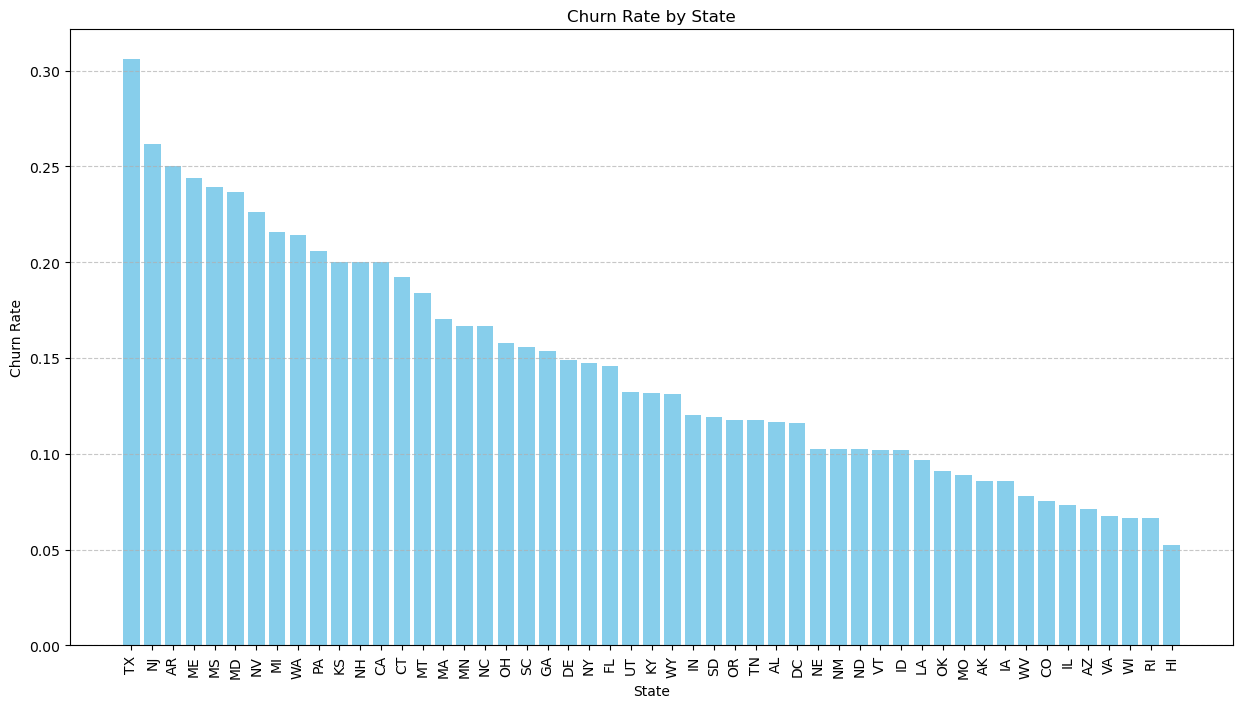

In [15]:
states = churn_by_state_sorted.index
churn_rates = churn_by_state_sorted['Churn Rate']

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(states, churn_rates, color='skyblue')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by State')
plt.xticks(rotation=90)  # Rotar las etiquetas de los estados para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


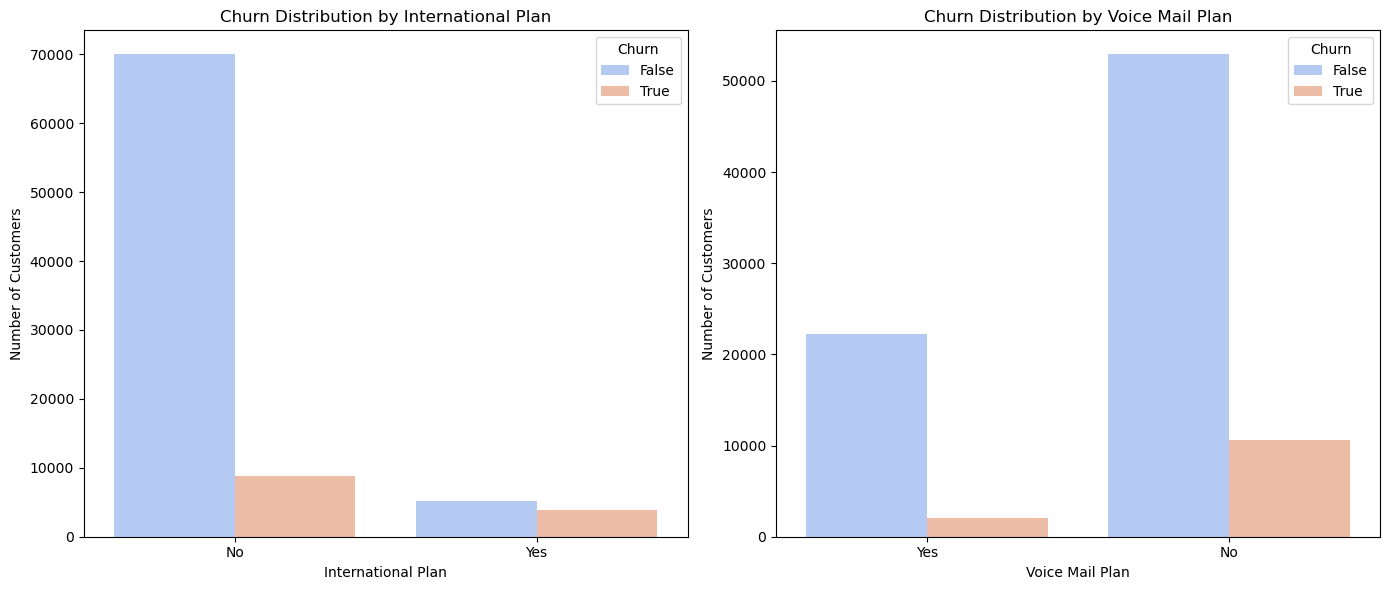

(International plan
 No    0.11
 Yes   0.43
 Name: Churn, dtype: float64,
 Voice mail plan
 No    0.17
 Yes   0.08
 Name: Churn, dtype: float64)

In [16]:
# Calcular las tasas de abandono para International Plan y Voice Mail Plan
international_plan_churn_rate = df.groupby('International plan')['Churn'].mean()
voice_mail_plan_churn_rate = df.groupby('Voice mail plan')['Churn'].mean()

# Preparar los gráficos
plt.figure(figsize=(14, 6))

# Gráfico para International Plan
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
sns.countplot(x='International plan', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')

# Gráfico para Voice Mail Plan
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
sns.countplot(x='Voice mail plan', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Mostrar tasas de abandono calculadas
international_plan_churn_rate, voice_mail_plan_churn_rate


In [17]:
# Es logico el cargo a los clientes?
df["dayChargePerMin"] = df["Total day charge"]/df["Total day minutes"]
df["eveChargePerMin"] = df["Total eve charge"]/df["Total eve minutes"]
df["nightChargePerMin"] = df["Total night charge"]/df["Total night minutes"]

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,dayChargePerMin,eveChargePerMin,nightChargePerMin
0,KS,128.00,415.00,No,Yes,25.00,265.10,110.00,45.07,197.40,99.00,16.78,244.70,91.00,11.01,10.00,3.00,2.70,1.00,False,0.17,0.09,0.04
1,OH,107.00,415.00,No,Yes,26.00,161.60,123.00,27.47,195.50,103.00,16.62,254.40,103.00,11.45,13.70,3.00,3.70,1.00,False,0.17,0.09,0.05
2,NJ,137.00,415.00,No,No,0.00,243.40,114.00,41.38,121.20,110.00,10.30,162.60,104.00,7.32,12.20,5.00,3.29,0.00,False,0.17,0.08,0.05
3,OH,84.00,408.00,Yes,No,0.00,299.40,71.00,50.90,61.90,88.00,5.26,196.90,89.00,8.86,6.60,7.00,1.78,2.00,False,0.17,0.08,0.04
4,OK,75.00,415.00,Yes,No,0.00,166.70,113.00,28.34,148.30,122.00,12.61,186.90,121.00,8.41,10.10,3.00,2.73,3.00,False,0.17,0.09,0.04


In [18]:
perMinutes = ["dayChargePerMin", "eveChargePerMin", "nightChargePerMin"]
uniqueValues = df[perMinutes].apply(lambda x: x.unique())

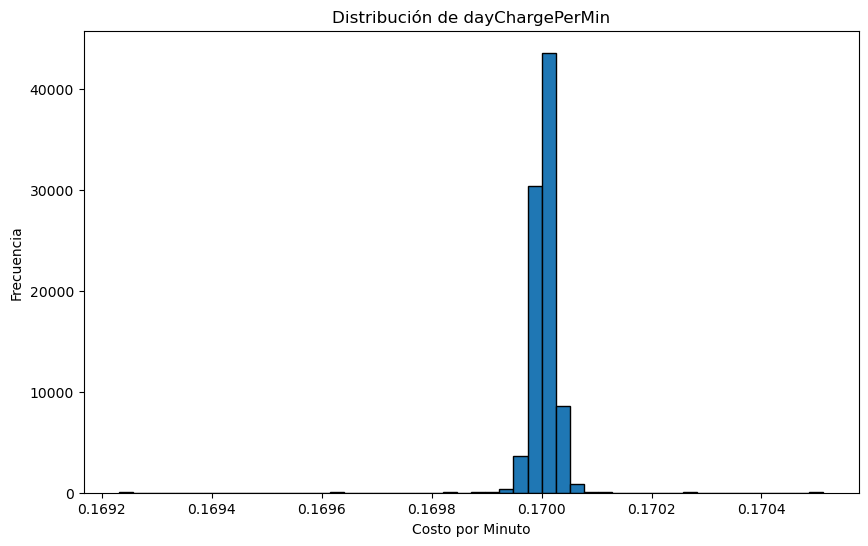

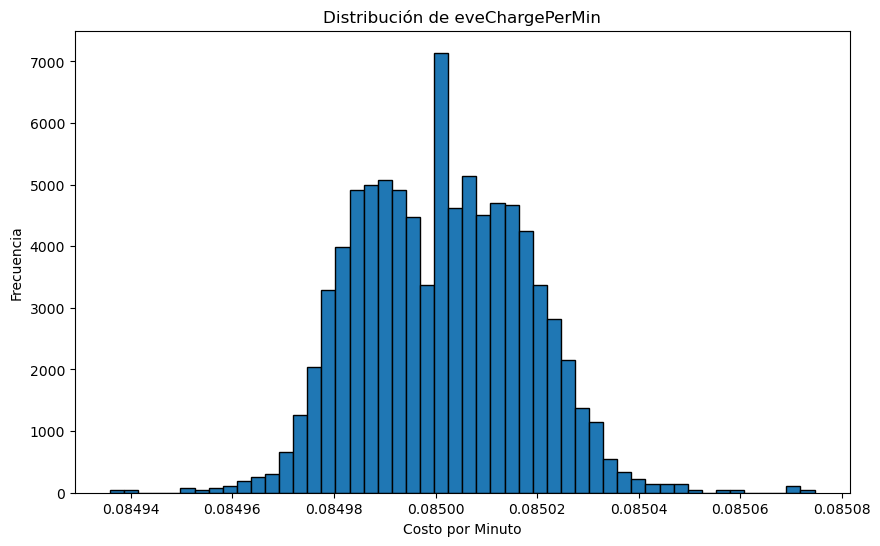

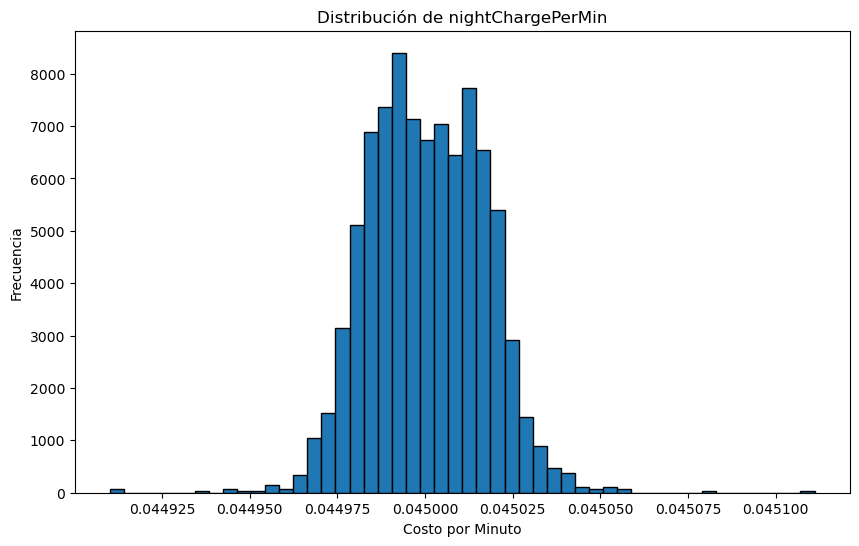

In [19]:
# Crear un histograma para visualizar la distribución del costo por minuto
for col in perMinutes:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=50, edgecolor='black')
    plt.title(f"Distribución de {col}")
    plt.xlabel('Costo por Minuto')
    plt.ylabel('Frecuencia')
    plt.show()

### Conclusiones 

El análisis de la proporción de abandono ("Churn") por estado muestra variaciones significativas entre los estados. Por ejemplo:

Nueva Jersey (NJ) tiene la tasa de abandono más alta con aproximadamente 29.17%.
Texas (TX) le sigue de cerca con 29.09%.
En contraste, Hawai (HI) tiene la tasa más baja con solo 4.65%.
Virginia (VA) también tiene una tasa baja de 6.15%.
Estas diferencias sugieren que la columna "State" podría tener una influencia en la variable "Churn" y, por tanto, podría ser útil para incluirla en un análisis más detallado o modelos predictivos de churn. Sin embargo, es importante considerar que la utilidad real de esta variable también puede depender de la capacidad del modelo para manejar variables categóricas con muchas categorías y cómo estas interacciones afectan a otros predictores.

#### Tasa de Abandono por Plan Internacional
* Sin Plan Internacional: La tasa de abandono es aproximadamente 11.32%.
* Con Plan Internacional: La tasa de abandono es significativamente más alta, alrededor del 43.66%.

Plan Internacional: Parece ser un factor significativo en la decisión de abandono de los clientes. Los clientes con este plan son más propensos a abandonar, lo que puede indicar problemas con el costo o la calidad del servicio internacional.
#### Tasa de Abandono por Plan de Buzón de Voz
* Sin Plan de Buzón de Voz: La tasa de abandono es aproximadamente 16.77%.
* Con Plan de Buzón de Voz: La tasa de abandono es más baja, alrededor del 8.94%.

Plan de Buzón de Voz: Tener este plan parece ser un factor protector contra el abandono. Esto podría sugerir que los clientes que utilizan servicios adicionales como el buzón de voz están más satisfechos o más vinculados a sus planes.


#### Relacion con el costo por minuto.
Podemos observar que la distribucion de el cargo por minuto es razonanble, a todos los clientes se cobra por la cantidad de minutos y no existe una disparidad significativa. 
* 1- Costo por minuto diario (mañana y medio dia): 0.17.
* 2- Costo por minuto a la tarde: 0.085.
* 3- Costo por minuto a la noche: 0.045.

Llama la atencion que el costo del dia, sea excesivamente mas caro que llamar a la tarde o a la noche. Un 100% mas respecto a la tarde y un 278% mas con respecto a la noche. La mencionada disparidad en la facturacion del consumo puede ocasionar perdida de clientes.

## Relaciones con variables numericas

In [20]:
# ax = sns.pairplot(df[['day_min','day_calls','day_charge','churn']],hue='churn')

In [21]:
df[num_features].describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00,87838.00
mean,100.43,8.05,179.33,100.23,30.49,199.77,100.06,16.98,201.29,100.06,9.06,10.27,4.43,2.77,1.56
std,39.67,13.61,53.73,19.94,9.13,50.91,20.23,4.33,50.87,19.43,2.29,2.79,2.41,0.75,1.31
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.70,33.00,1.97,0.00,0.00,0.00,0.00
25%,73.00,0.00,143.40,87.00,24.38,164.50,87.00,13.98,166.30,87.00,7.48,8.50,3.00,2.30,1.00
50%,100.00,0.00,180.05,100.00,30.61,200.90,100.00,17.08,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,19.00,215.90,114.00,36.70,234.70,114.00,19.95,236.70,113.00,10.65,12.10,6.00,3.27,2.00
max,243.00,50.00,346.80,160.00,58.96,363.70,170.00,30.91,395.00,166.00,17.77,20.00,19.00,5.40,9.00


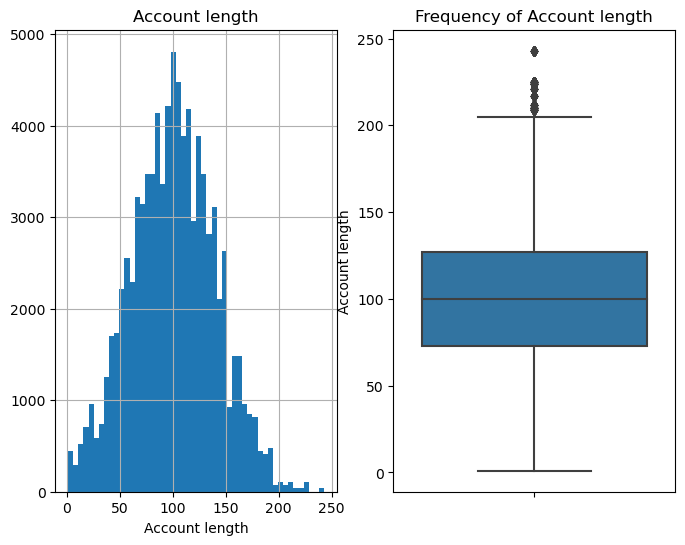

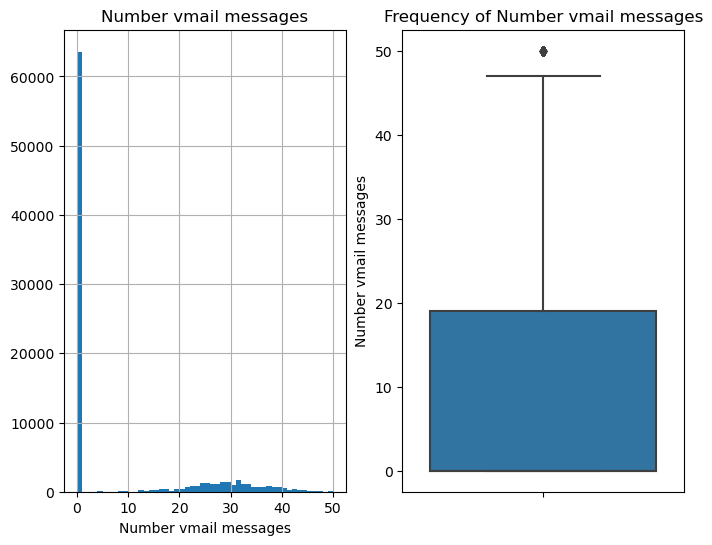

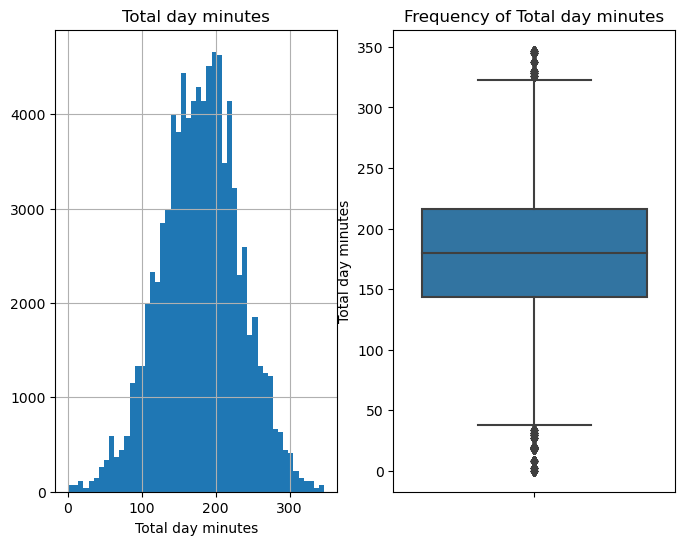

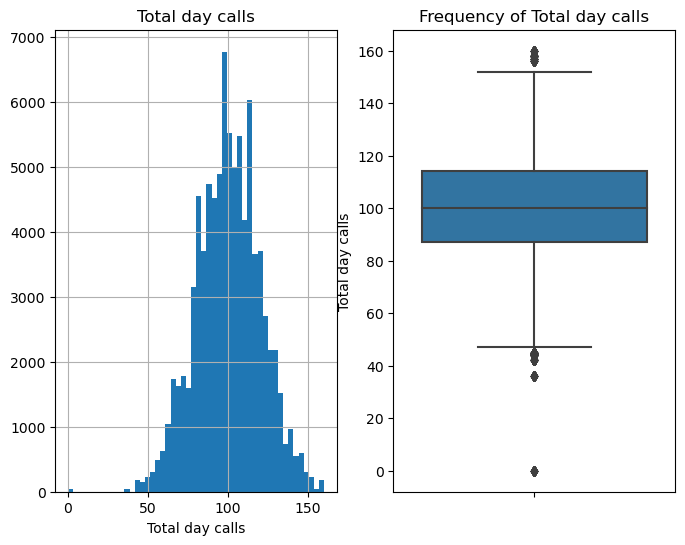

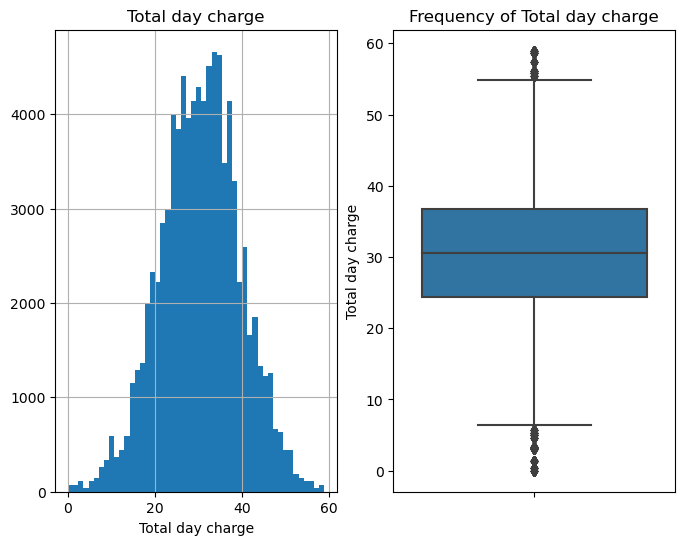

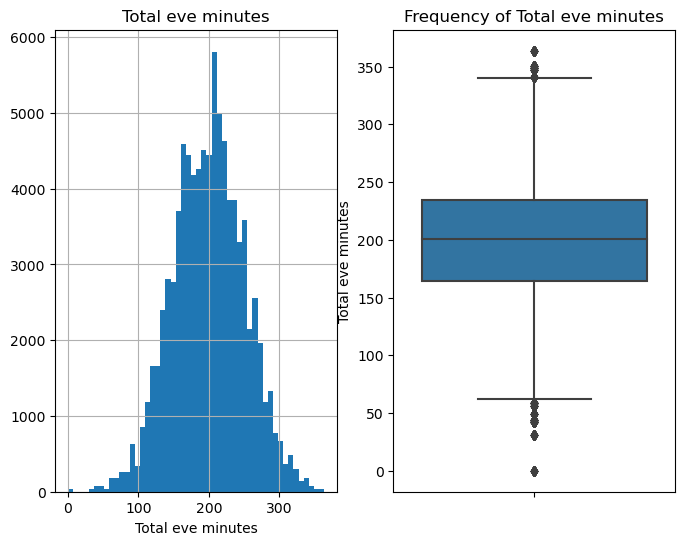

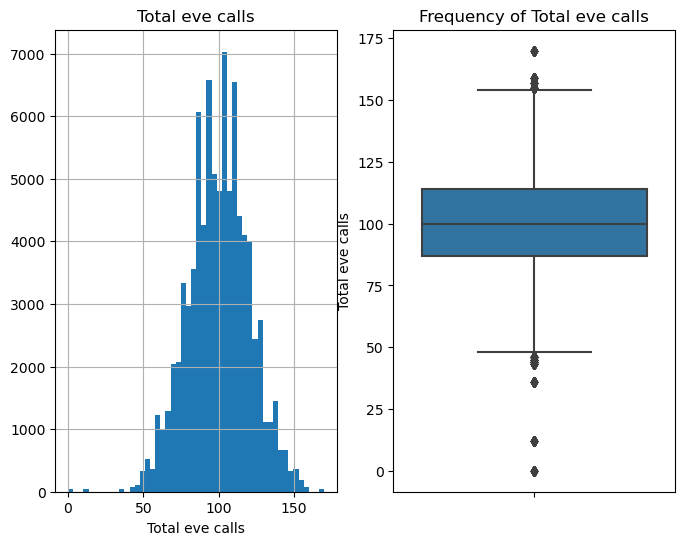

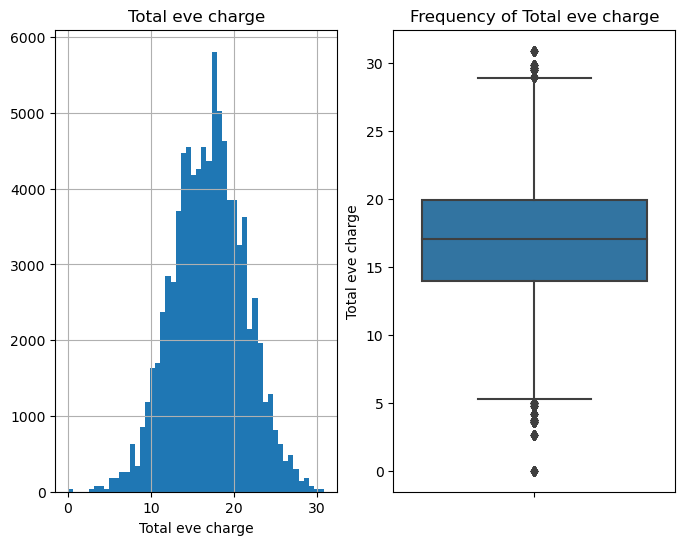

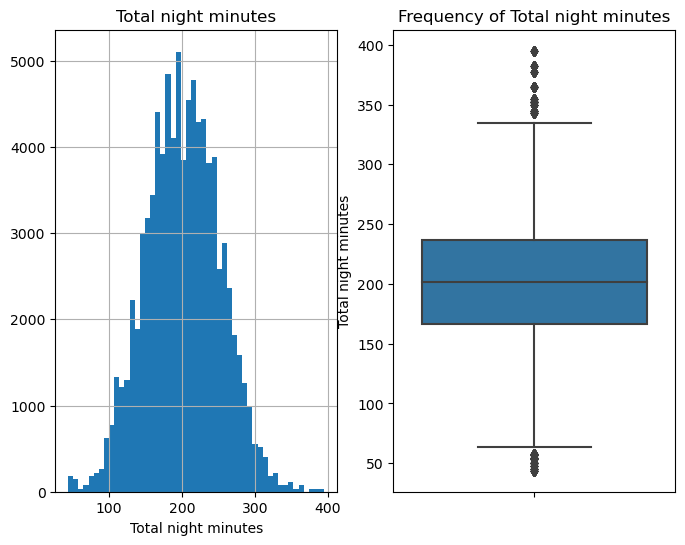

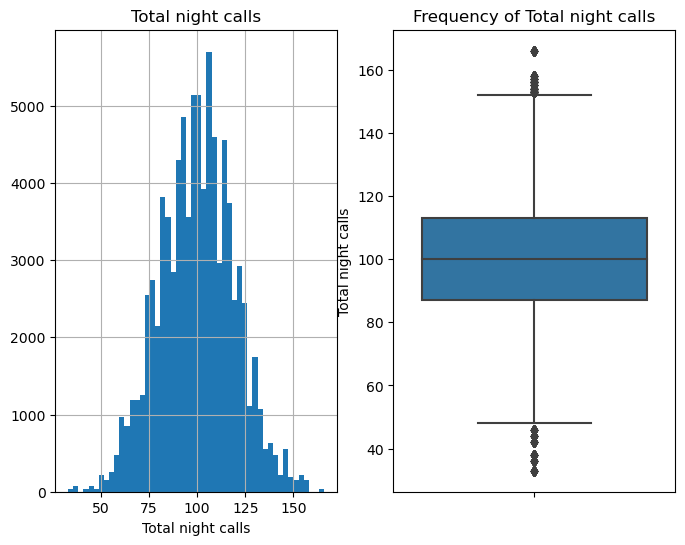

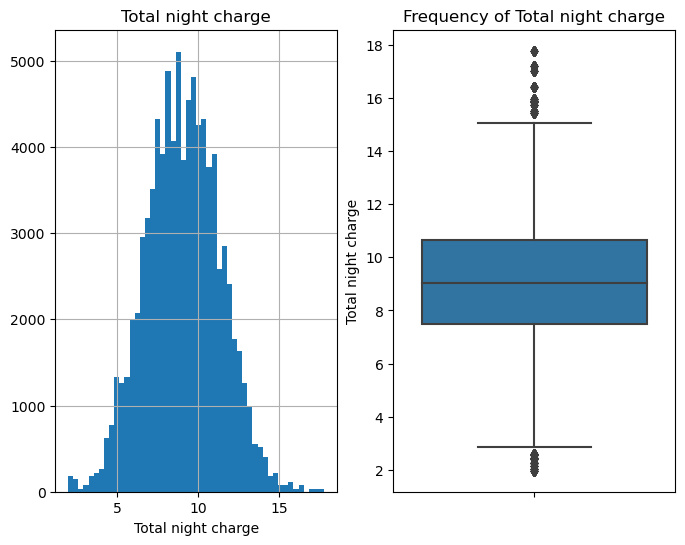

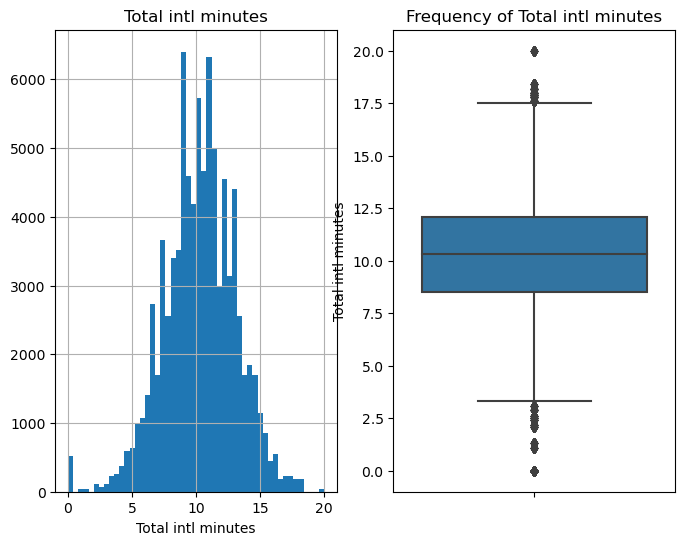

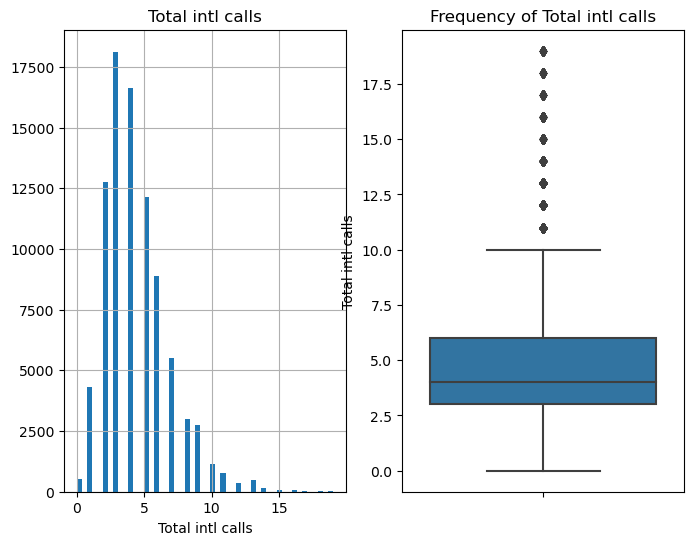

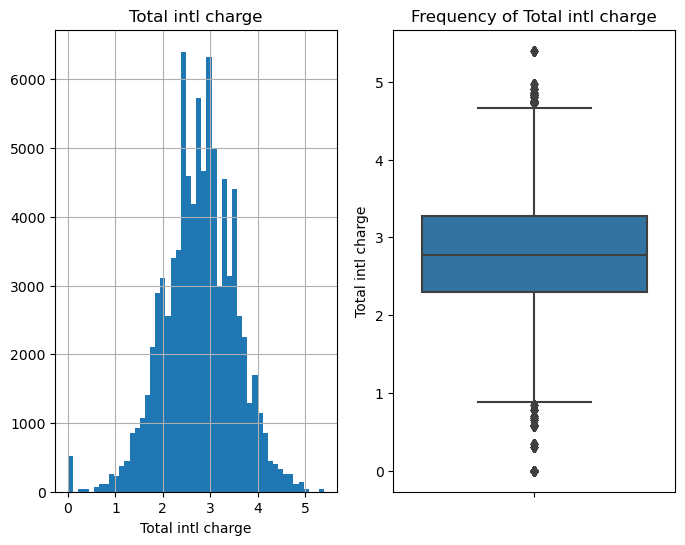

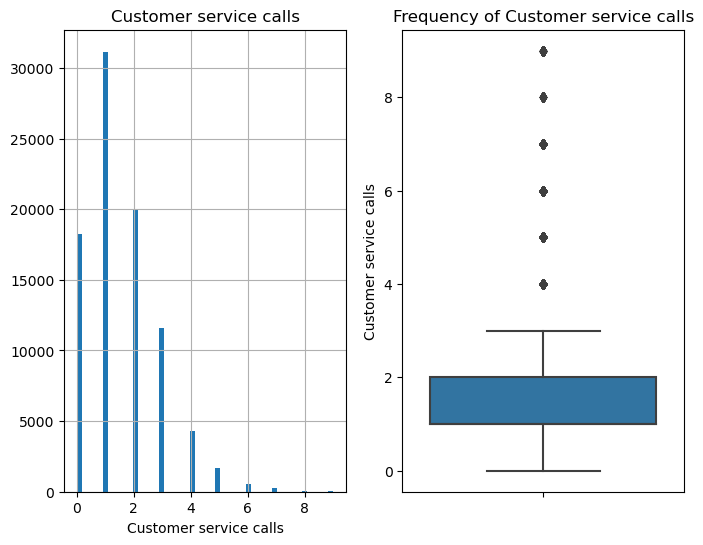

In [22]:
def num_summary(dataframe, numerical_col):
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)
            
for cols in num_features:
    num_summary(df, cols)

* Se han identificado algunos valores atípicos en los datos que pueden requerir un análisis más detallado. Estos valores atípicos podrían tener un impacto significativo en los resultados y deben investigarse para comprender su impacto en el análisis y el modelado.

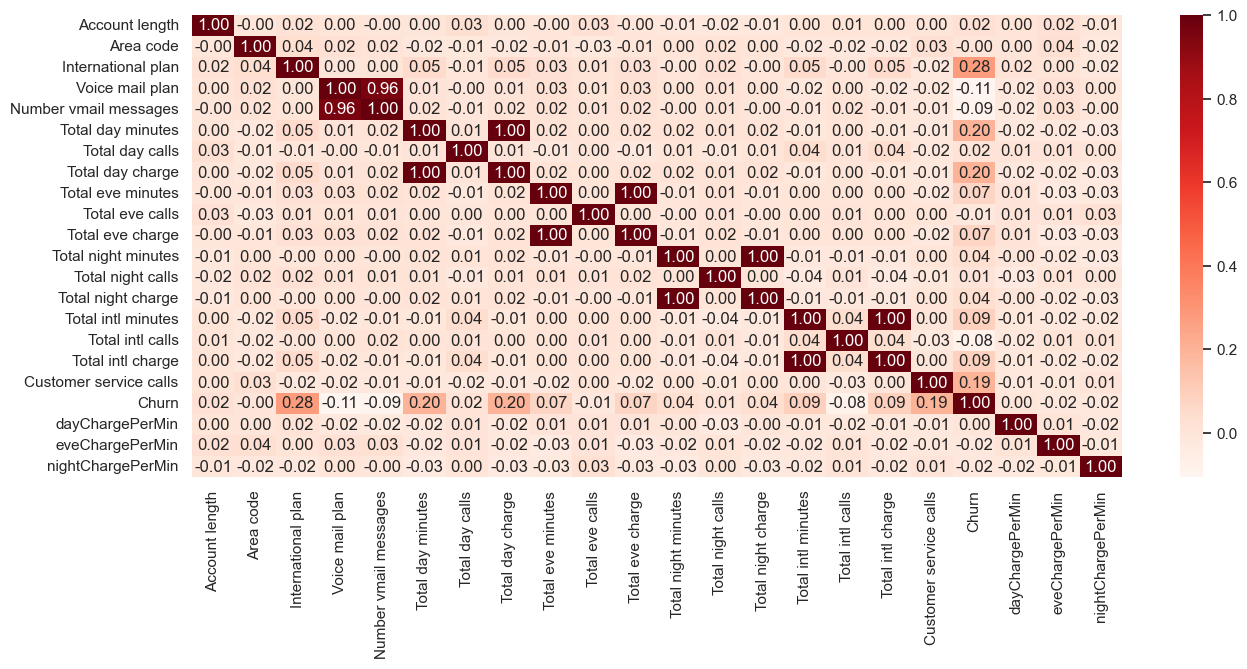

In [23]:
#transformaremos la variables categoricas para reflejarlas en el analisis
df['Churn'] = df['Churn'].astype(int)
df["International plan"] = df["International plan"].map({"Yes": 1, "No":0})
df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No":0})


# Matriz de correlacion:
corr = df.corr()
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f")
plt.show()

### Conclusiones de la matriz de correlacion:

Las mayores variables relacionadas con la tasa de abandono son:
* International Plan: Hay una tasa mayor cuando se cuenta con un plan internacional, como se habia analizado. Podria considerarse una falla en la empresa al momento de brindar este tipo de servicio.
* Customer service calls: a medida que mas llamadas realizan, mayor es la probabilidad de abandono, lo cual es logico. 
* Total day minutes y total day charge: Los clientes que mas pagan costos del servicio es mas probable que lo abandonen. Descuentos por cantidad o regalos de minutos podria dismunuir la tasa de abandono.  

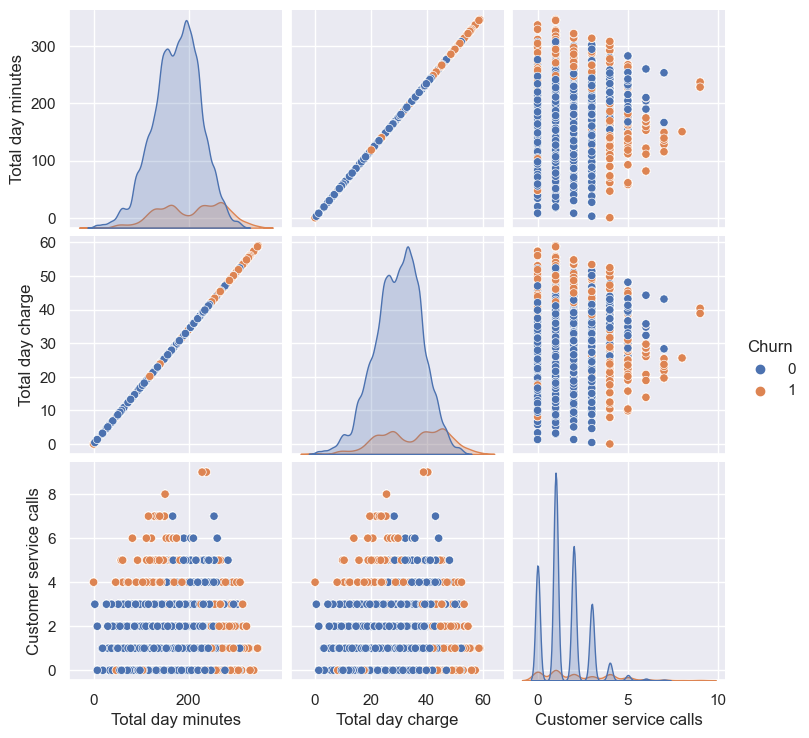

In [24]:
# graficaremos estas conclusiones

ax = sns.pairplot(df[['Total day minutes','Total day charge','Customer service calls','Churn']],hue='Churn')

Analizaremos las variables que mas correlacion tiene con la tasa de abandono agrupado por su estado. De esta manera, terminaremos de responder si "State" tiene incidencia directa con la tasa de abandono.

In [25]:
principal_variables = ["Churn", "International plan", "Total day charge", "Customer service calls"]
df.groupby("State")[principal_variables].mean().sort_values(by =["Churn"], ascending = False)

,Churn,International plan,Total day charge,Customer service calls
State,,,,
TX,0.31,0.12,31.20,1.49
NJ,0.26,0.10,33.45,1.79
AR,0.25,0.17,29.75,2.12
ME,0.24,0.12,30.55,1.56
MS,0.24,0.11,29.57,1.72
MD,0.24,0.15,33.48,1.65
NV,0.23,0.13,30.45,1.57
MI,0.22,0.12,30.29,1.69
WA,0.21,0.05,29.35,1.55


Por ahora no se puede concluir que la variable State NO tenga incidencia directa en la tasa de abandono.